## Variables ecómicas

Unión de las variables economicas en la variable *df_var*

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [2]:
%store -r df_mex         #Invesion_ES.pynb
%store -r df_desempleo   #edit_Desempleo.pynb
%store -r df_IED         #edit_IED.pynb
%store -r df_IPC         #edit_IPC.pynb
%store -r df_reservas    #edit_reservas.pynb
%store -r df_deuda       #edit_deuda.pynb
%store -r df_interes
%store -r df_balanzapagos 
%store -r df_import
%store -r df_export
%store -r df_PIB_total

no stored variable #Invesion_ES.pynb
no stored variable #edit_Desempleo.pynb
no stored variable #edit_IED.pynb
no stored variable #edit_IPC.pynb
no stored variable #edit_reservas.pynb
no stored variable #edit_deuda.pynb


In [4]:
df_var = pd.concat([df_IPC,df_desempleo,df_mex,df_IED,df_reservas,df_deuda,df_interes, df_balanzapagos, df_import, df_export, df_PIB_total], axis=1)

In [5]:
df_var

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
1993,9.75,3.37,47.13597,3903.58,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,500736.07
1994,6.97,4.44,17.01775,8807.63,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,527813.24
1995,35.00,7.10,8.26311,7113.28,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,360073.91
1996,34.38,5.47,13.62250,7275.91,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,410975.60
1997,20.63,4.24,46.83067,11720.02,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,500413.48
1998,15.93,3.73,35.71018,10876.42,27166.55,136569.31,26.36,-13635.34,110046.79,100146.40,526502.13
1999,16.59,2.60,50.16676,13837.88,31592.87,166731.61,23.74,-13896.14,145002.98,135381.71,600232.87
2000,9.49,2.65,69.98563,19505.44,37751.05,161879.29,16.93,-19898.19,190429.25,176532.02,707906.74
2001,6.37,2.63,35.13027,33742.37,50293.24,186407.40,12.80,-19927.19,194236.28,177969.01,756706.30
2002,5.03,3.00,30.76274,22910.10,48259.49,149787.48,8.21,-14168.26,164848.06,153033.54,772106.38


Text(0.5, 1.0, 'Evolución variables economicas')

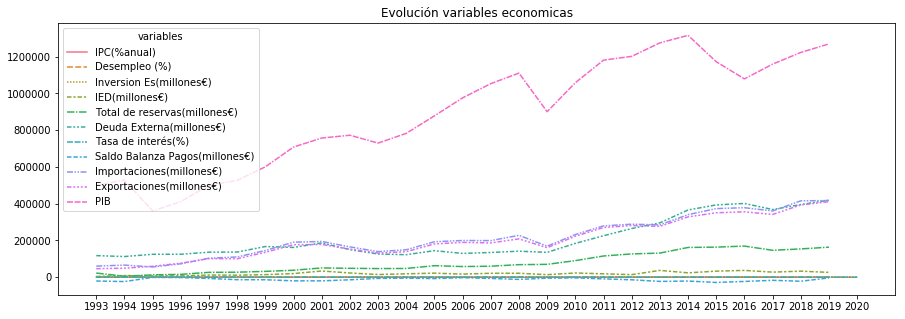

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_var)
plt.title('Evolución variables economicas')

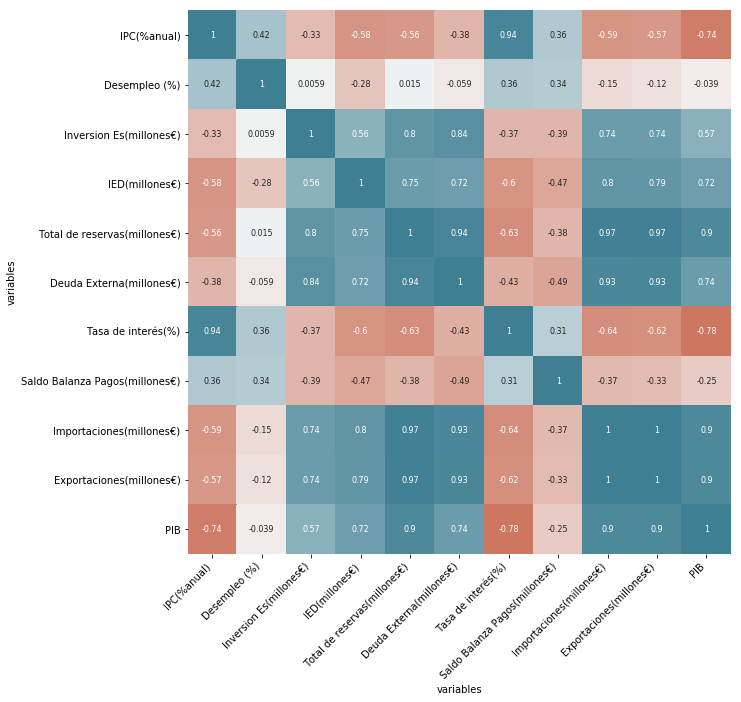

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(df_var.corr(), annot=True,
            cbar      = False,
            annot_kws = {"size": 8},
            vmin      = -1,
            vmax      = 1,
            center    = 0,
            cmap      = sns.diverging_palette(20, 220, n=200),
            square    = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

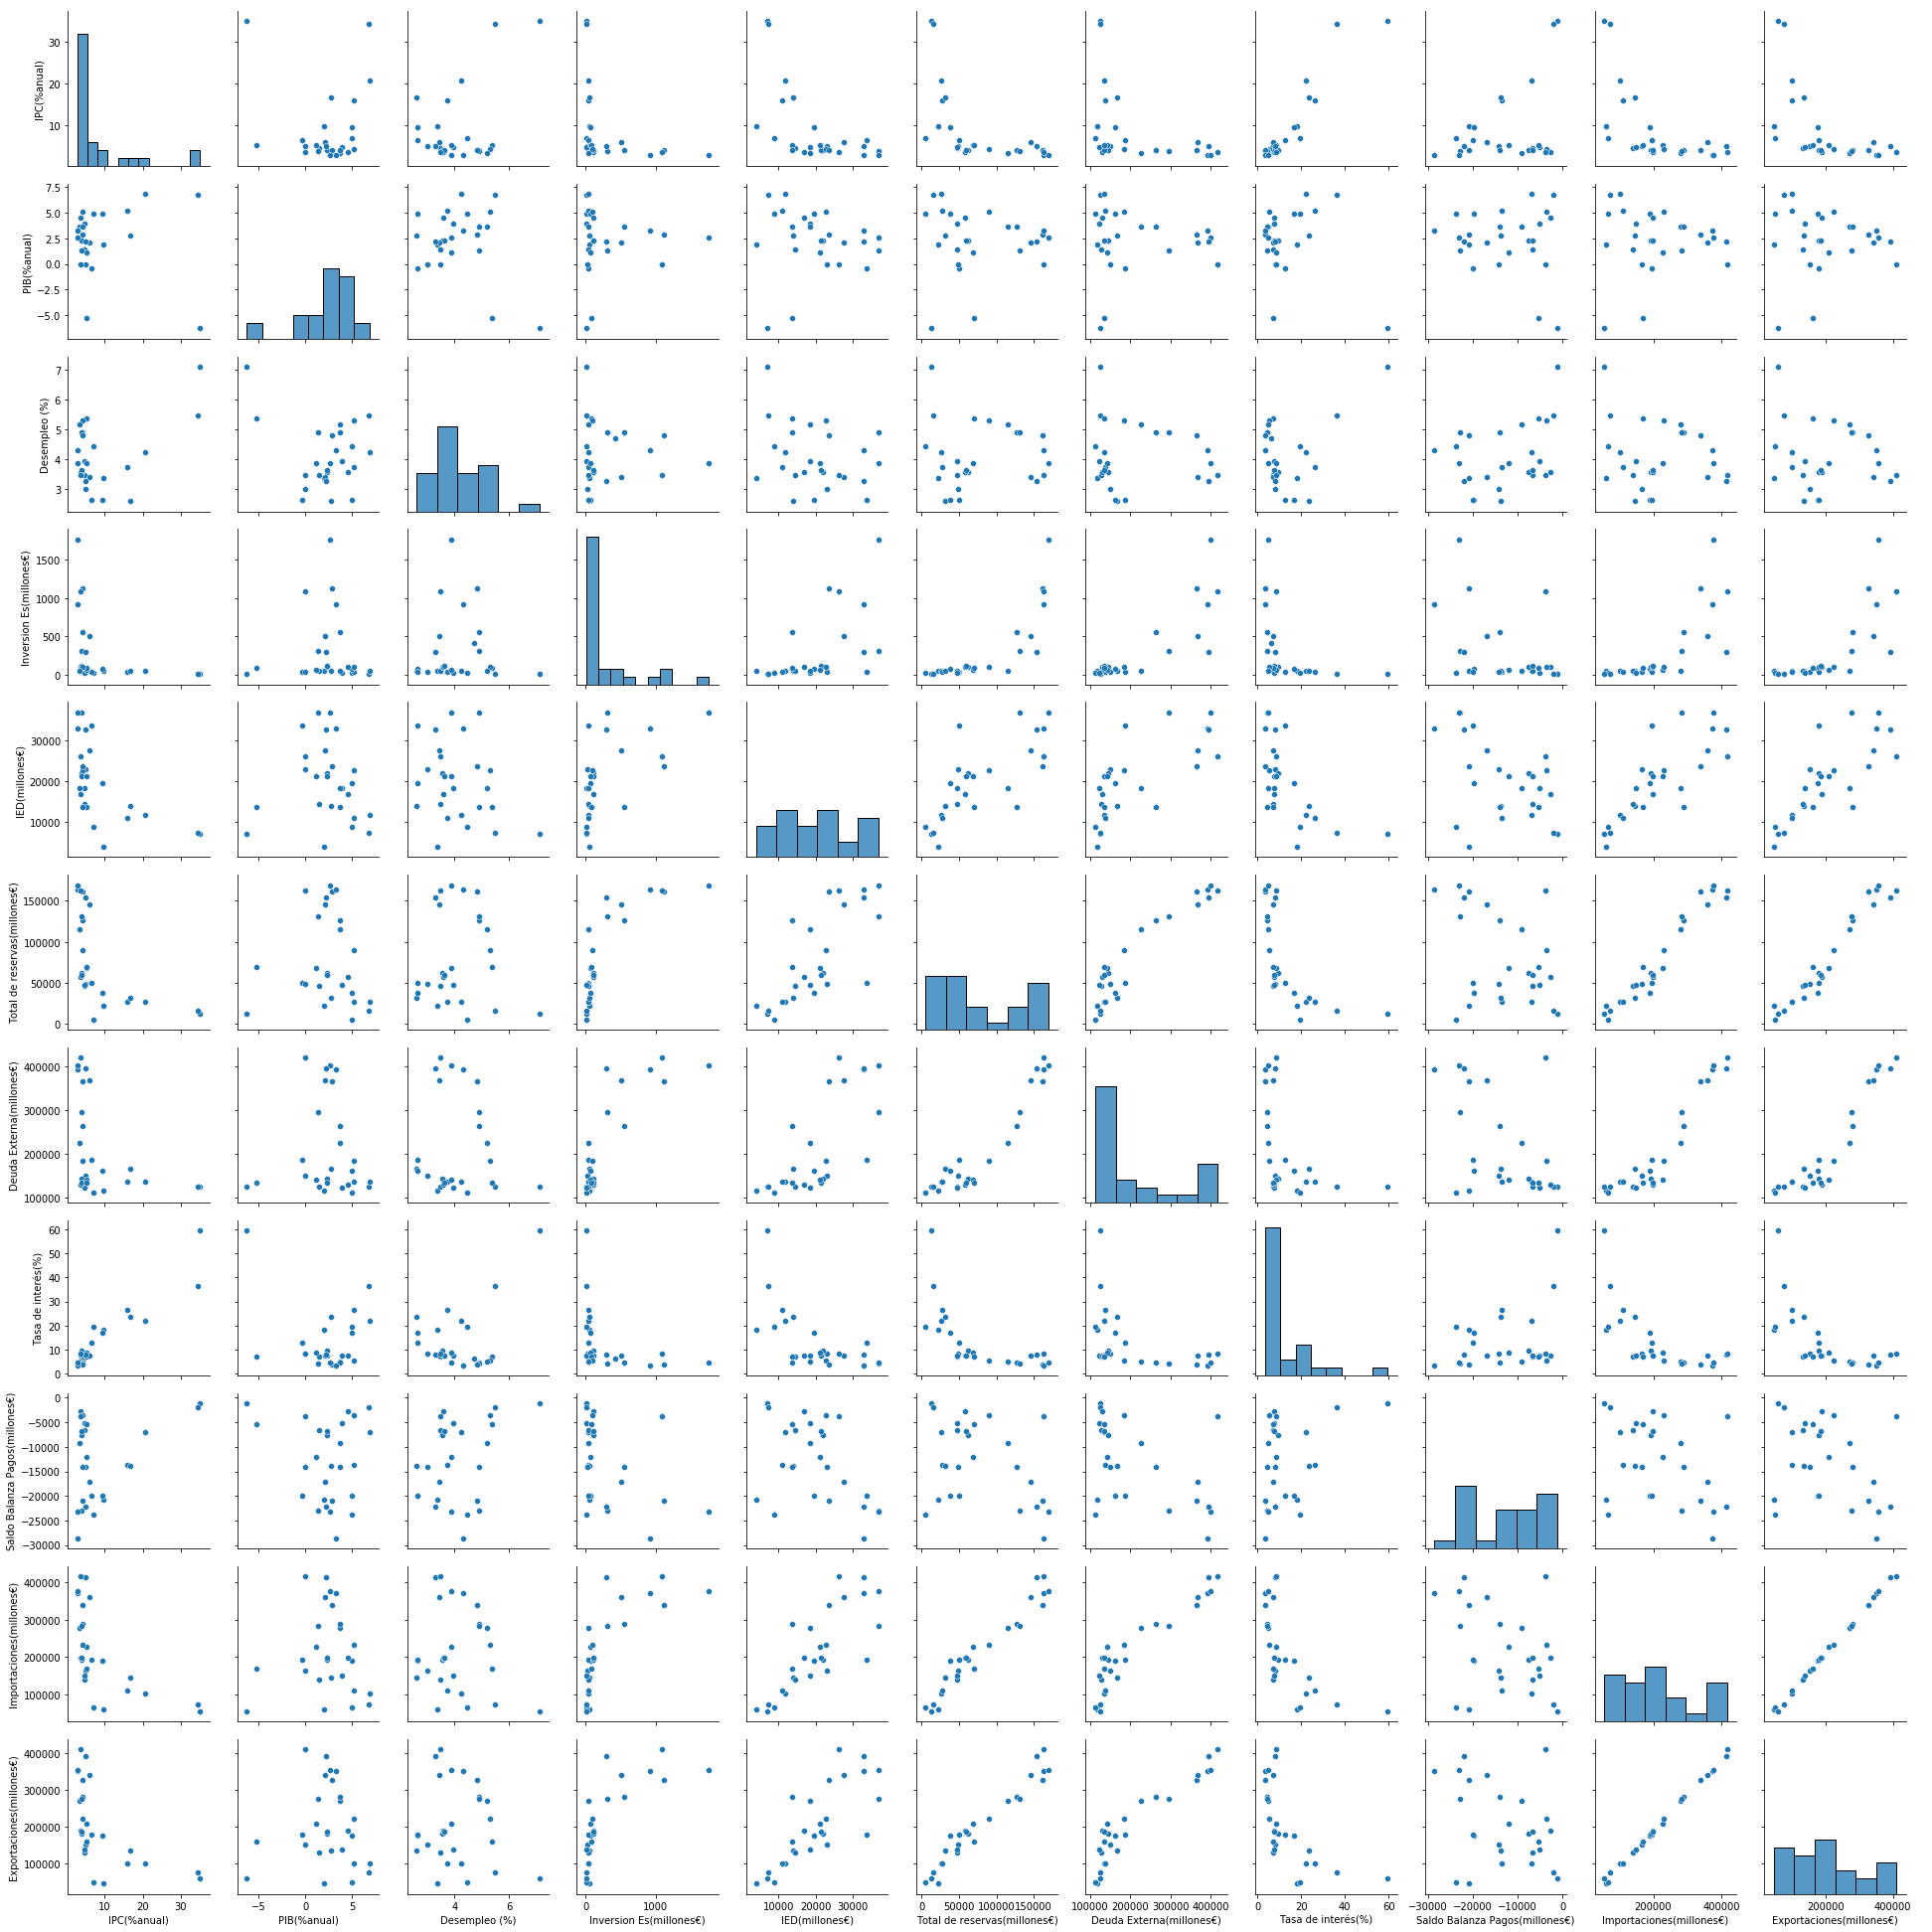

In [24]:
sns.pairplot(df_var)

In [8]:
df_var.corr()

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
variables,,,,,,,,,,,
IPC(%anual),1.000000,0.419877,-0.332556,-0.578643,-0.560967,-0.381908,0.940408,0.361263,-0.592327,-0.568485,-0.736757
Desempleo (%),0.419877,1.000000,0.005864,-0.283701,0.014644,-0.058791,0.364423,0.335668,-0.145430,-0.115479,-0.039340
Inversion Es(millones€),-0.332556,0.005864,1.000000,0.558534,0.801359,0.836744,-0.372348,-0.393364,0.742804,0.742917,0.573100
IED(millones€),-0.578643,-0.283701,0.558534,1.000000,0.749036,0.724511,-0.599295,-0.470357,0.802351,0.790146,0.722767
Total de reservas(millones€),-0.560967,0.014644,0.801359,0.749036,1.000000,0.942006,-0.625981,-0.376357,0.969687,0.972024,0.900591
Deuda Externa(millones€),-0.381908,-0.058791,0.836744,0.724511,0.942006,1.000000,-0.432215,-0.485203,0.929301,0.930587,0.740407
Tasa de interés(%),0.940408,0.364423,-0.372348,-0.599295,-0.625981,-0.432215,1.000000,0.308261,-0.640124,-0.623066,-0.783452
Saldo Balanza Pagos(millones€),0.361263,0.335668,-0.393364,-0.470357,-0.376357,-0.485203,0.308261,1.000000,-0.365652,-0.331029,-0.249038
Importaciones(millones€),-0.592327,-0.145430,0.742804,0.802351,0.969687,0.929301,-0.640124,-0.365652,1.000000,0.998556,0.904690


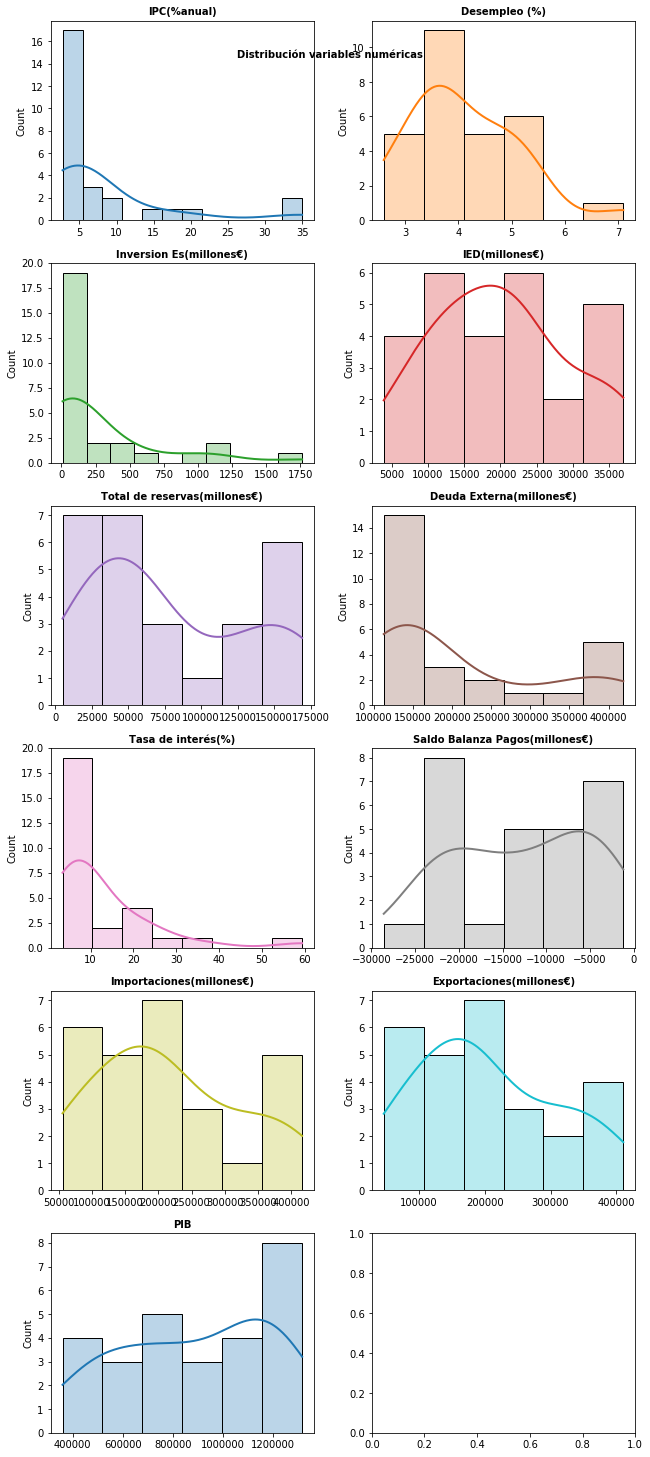

In [15]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(9, 20))
axes = axes.flat
columnas_numeric = df_var.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_var,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 1)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [19]:
# División de los datos en train y test
# ==============================================================================
X = df_var[['IPC(%anual)', 'Desempleo (%)', 'IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Tasa de interés(%)', 'Deuda Externa(millones€)', 'Tasa de interés(%)', 'Saldo Balanza Pagos(millones€)','Importaciones(millones€)', 'Exportaciones(millones€)','PIB'   ]]
y = df_var['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

MissingDataError: exog contains inf or nans